In [ ]:
# windows analysis 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from statannot import add_stat_annotation 

In [ ]:
## 1. Fig 3g --- --- 

['orf19.6265.1::RPS14B', 'orf19.3415.1::RPL32', 'orf19.7600::FDH3', 'orf19.3590::IPP1', 'orf19.5928::RPP2B', 'orf19.7043.1::ACB1', 'orf19.5854::SBP1', 'orf19.1409.1::orf19.1409.1', 'orf19.6375::RPS20', 'orf19.2877::PDC11', 'orf19.4490::RPL17B', 'orf19.5927::RPS15', 'orf19.7611::TRX1', 'orf19.2803::HEM13', 'orf19.3942.1::RPL43A', 'orf19.804.1::orf19.804.1', 'orf19.1635::RPL12', 'orf19.6882.1::orf19.6882.1', 'orf19.2329.1::RPS17B', 'orf19.5213.1::COX8', 'orf19.2107.1::STF2', 'orf19.3223::ATP3', 'orf19.1467::COX13', 'orf19.382::TEF2', 'orf19.3575::CDC19', 'orf19.1700::RPS7A', 'orf19.6264.4::orf19.6264.4', 'orf19.5660.1::orf19.5660.1', 'orf19.3003.1::RPL6', 'orf19.827.1::RPL39', 'orf19.903::GPM1', 'orf19.1470::RPS26A', 'orf19.3888::PGI1', 'orf19.4660::RPS6A', 'orf19.6403.1::RPP2A', 'orf19.5341::RPS4A', 'orf19.3572.3::orf19.3572.3', 'orf19.5964.2::RPL35', 'orf19.3334::RPS21', 'orf19.2864.1::RPL28', 'orf19.7018::RPS18', 'orf19.2111.2::RPL38', 'orf19.3465::RPL10A', 'orf19.1435::TEF1', 'orf19.

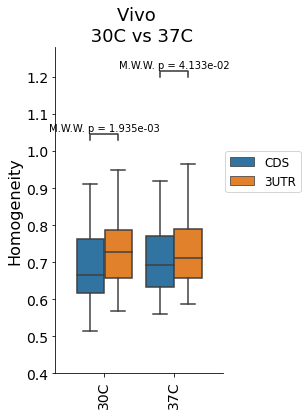

In [6]:
dir = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure3/Data/'
pure = pd.read_csv(dir+'vivo_pure_allinfo_CDS_UTR.txt', sep='\t')
pure.columns 
pure=pure.dropna()
pure['weighted_corr'] = pd.to_numeric(pure['weighted_corr'], errors='coerce')
pure['window_start'] = pd.to_numeric(pure['window_start'], errors='coerce')
pure['window_end'] = pd.to_numeric(pure['window_end'], errors='coerce')
pure['window_start'] = pure['window_start'].astype(int)
pure['window_end'] = pure['window_end'].astype(int)
pure['win_length'] = pure['window_end'].astype(int) - pure['window_start'].astype(int)
pure['id'] = pure['gene'] + '_' + pure['window_start'].astype(str)  + '_' + pure['window_end'].astype(str)

dir = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure3/Data/'
win = pd.read_csv(dir+'vivo_pure_3UTR_CDS_1st_window.txt',sep='\t')
win['id'] = win['gene'] + '_' + win['start'].astype(str)  + '_' + win['end'].astype(str)

pure_flt = pure[pure['id'].isin(list(win.id))]
tmp1 = pure_flt[pure_flt['condition'] == '30C']
tmp1_cds = tmp1[tmp1['region'] == 'CDS']   
tmp1_utr = tmp1[tmp1['region'] == '3UTR']  
common_30C = list(set(list(tmp1_cds.gene)) &  set(list(tmp1_utr.gene)))

tmp2 = pure_flt[pure_flt['condition'] == '37C']
tmp2_cds = tmp2[tmp2['region'] == 'CDS']   
tmp2_utr = tmp2[tmp2['region'] == '3UTR']  
common_37C = list(set(list(tmp2_cds.gene)) &  set(list(tmp2_utr.gene)))

common_all = list(set(common_30C) & set(common_37C))
print(common_all)
print(len(common_all))

dplot = pure_flt[(pure_flt['condition'] == '30C') | (pure_flt['condition'] == '37C')]
dplot = dplot[dplot['gene'].isin(common_all)]


dplott = dplot[dplot['win_length'] == 100]

### plot---------------------------

plt.figure(figsize=(3,6))

ax = sns.boxplot(data=dplott, x='condition',y='weighted_corr', hue='region', showfliers = False, dodge=True) 
plt.title('Vivo \n 30C vs 37C',fontsize = 18)
plt.xlabel('',fontsize = 16) 
plt.ylabel('Homogeneity',fontsize = 16)
plt.xticks(fontsize = 14,rotation=90) 
plt.yticks(fontsize = 14) 
plt.ylim(0.4,1.2)
plt.legend(loc='best', bbox_to_anchor=(1.5, 0.7),prop={'size': 12})
ax.spines[['right', 'top']].set_visible(False) 


add_stat_annotation(ax, data = dplott, x = dplott['condition'], y = dplott['weighted_corr'], hue='region',
                    box_pairs = [(("30C", "CDS"), ("30C", "3UTR")), 
                                 (("37C", "CDS"), ("37C", "3UTR"))
                                 ],
                    
                    comparisons_correction = None,
                    test="Mann-Whitney", text_format='full', loc='inside', line_offset_to_box=0.1, verbose=3)  #line_offset_to_box=-0.001,

dir_out = '/home/han/proj_het_AC/rerun_analysis/0_Manuscript_codes_submission_20250723/Figure3/Data/'
plt.savefig(dir_out+'Fig3g_vivo_3UTR_CDS.pdf',bbox_inches='tight', dpi=300) 